In [53]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as  plt
df=pd.read_csv('C:/Users/chris/OneDrive/Documents/Nci/sem 1/dmml/hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [12]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [13]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [14]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [15]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [45]:
pd.set_option('display.max_columns',32)
data=df[~filter]

In [17]:
data.shape

(119210, 32)

In [18]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]
city.shape

(46084, 32)

In [20]:
resort.shape

(28927, 32)

In [21]:
cancel=data[data['is_canceled']==1]

In [22]:
rh_cancelations = cancel[cancel["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = cancel[cancel["hotel"] == "City Hotel"]["is_canceled"].sum()

In [23]:
rh_cancelations

11120

In [24]:
ch_cancelations

33079

In [25]:
cancellation=data[data['is_canceled']==1]
cancellation.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,2015-05-29


In [26]:
cancellation['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [27]:
cancel_month=data.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]

In [28]:
cancelled

,arrival_date_month,hotel,is_canceled
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


In [29]:
cancelled=cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,no of cancellations
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


In [30]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

features = num_features + cat_features

In [31]:
def Encode(df):
    for column in df.columns[df.columns.isin(['hotel','arrival_date_month','meal','market_segment',
                'distribution_channel','reserved_room_type','deposit_type','customer_type'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [32]:
from sklearn.model_selection import train_test_split
x = df_en.drop(["is_canceled"], axis=1)[features]
y = df_en["is_canceled"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

81217    0
85045    0
18389    0
55872    1
72996    1
Name: is_canceled, dtype: int64

In [33]:
df.shape

(119390, 32)

In [34]:
x_train


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,required_car_parking_spaces,total_of_special_requests,adr,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
81217,13,49,4,1,2,2,0.0,0,0,0,0,14.0,0.0,0,1,87.08,1,5,0,0,0,9,0,0
85045,35,10,3,2,3,2,0.0,0,0,0,0,9.0,0.0,0,2,118.10,1,8,2,2,2,1,0,0
18389,11,47,16,1,2,2,0.0,0,0,0,0,5.0,0.0,0,0,32.00,0,4,0,3,2,1,0,0
55872,137,35,23,0,4,3,0.0,0,0,0,0,9.0,0.0,0,0,133.20,1,1,0,2,2,2,0,0
72996,259,32,11,2,3,2,1.0,0,0,0,0,9.0,0.0,0,0,125.10,1,1,0,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60725,44,47,19,1,1,2,0.0,0,0,0,0,9.0,0.0,0,1,98.80,1,4,0,2,2,1,0,0
45251,45,43,24,2,2,2,0.0,0,0,0,0,15.0,0.0,0,0,76.77,1,3,0,2,2,9,0,0
17035,39,39,20,2,0,2,0.0,0,0,0,0,241.0,0.0,1,1,87.78,0,2,0,2,2,0,0,0
117498,175,31,1,0,4,2,2.0,0,0,0,0,0.0,0.0,0,1,260.00,1,1,0,0,0,4,0,0


In [63]:
from sklearn.ensemble import RandomForestClassifier
RForest=RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
RForest.fit(x_train,y_train)
predictions=RForest.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y_test))


[[7092 1300]
 [ 454 3093]]
0.8530865231593936


In [62]:
from xgboost import XGBClassifier
model= XGBClassifier(random_state=42, n_jobs=-1)
model.fit(x_train, y_train)
prediction = model.predict(x_test) 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction,y_test))


[19:53:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\chris\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[7013 1206]
 [ 533 3187]]
0.8543429097914398


In [64]:

from sklearn.linear_model import LogisticRegression
models=LogisticRegression(random_state=42,n_jobs=-1)
models.fit(x_train, y_train)
predicts = models.predict(x_test) 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicts, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(predicts,y_test))

[[6810 2078]
 [ 736 2315]]
0.7643018678281263


In [65]:

from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier(random_state=42)
Dtree.fit(x_train,y_train)
pred=Dtree.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))


[[6519  971]
 [1027 3422]]
0.8326493006114415


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
shar=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(shar, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(shar,y_test))



[[6462 1479]
 [1084 2914]]
0.7853254041377


In [66]:
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(x_train,y_train)
sharn=Gnb.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sharn, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(sharn,y_test))



[[2682  409]
 [4864 3984]]
0.5583382192813469


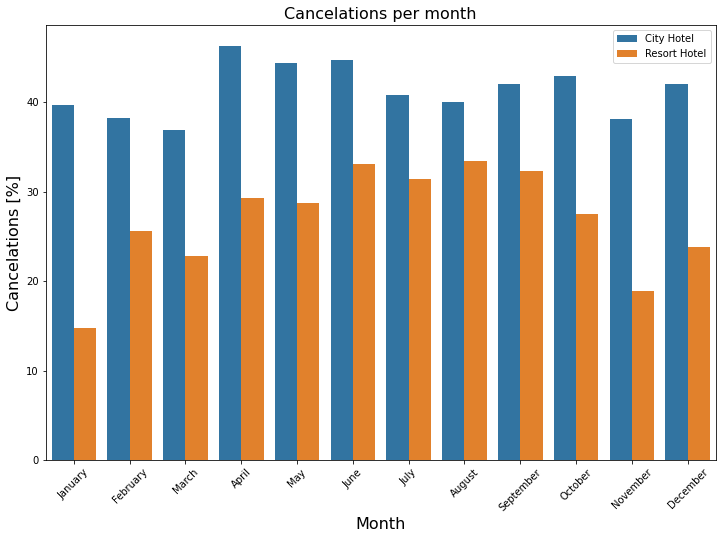

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
res_book_per_month = df[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()
